# Previsão de renda

### Etapa 1 CRISP - DM: Entendimento do negócio




Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

Estes dados estão no arquivo: ```previsao_de_renda.csv```

Variável target: ```renda```

### Etapa 2 Crisp-DM: Entendimento dos dados







A segunda etapa é o entendimento dos dados. Foram fornecidas 14 variáveis mais a variável resposta (Renda). O significado de cada uma dessas variáveis se encontra após "Carregando os pacotes" e "Carregando os dados". 

Está na tabela -> Dicionário de dados.

### Carregando os pacotes


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tqdm as notebook_tqdm

import statsmodels.api as sm
import statsmodels.formula.api as smf

from ydata_profiling import ProfileReport

import patsy

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

sns.set_theme()
%matplotlib inline

### Carregando os dados


In [3]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [4]:
renda.head(5)

,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


### Dicionário de dados

In [5]:
dict_dados = pd.DataFrame({'Variável': renda.columns, 
                   'Descrição': ['Variável sem identificação da origem',
                   'Data de referência de coleta das variáveis',
                   'Código de identificação do cliente',
                   'Sexo do cliente',
                   'Indica se o cliente possui veículo',
                   'Indica se o cliente possui imóvel',
                   'Quantidade de filhos do cliente',
                   'Tipo de renda do cliente',
                   'Grau de instrução do cliente',
                   'Estado civil do cliente',
                   'Tipo de residência do cliente (própria, alugada etc)',
                   'Idade do cliente',
                   'Tempo no emprego atual',
                   'Quantidade de pessoas que moram na residência',
                   'Renda em reais'],
                   'Tipo': renda.dtypes}).reset_index(drop= True)
dict_dados

,Variável,Descrição,Tipo
0,Unnamed: 0,Variável sem identificação da origem,int64
1,data_ref,Data de referência de coleta das variáveis,object
2,id_cliente,Código de identificação do cliente,int64
3,sexo,Sexo do cliente,object
4,posse_de_veiculo,Indica se o cliente possui veículo,bool
5,posse_de_imovel,Indica se o cliente possui imóvel,bool
6,qtd_filhos,Quantidade de filhos do cliente,int64
7,tipo_renda,Tipo de renda do cliente,object
8,educacao,Grau de instrução do cliente,object
9,estado_civil,Estado civil do cliente,object


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [6]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
prof.to_file('./output/renda_analisys.html')

C:\Users\Usuario\anaconda3\lib\site-packages\ydata_profiling\profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##### Para visualizar acesse na versão html - pasta output 

### arquivo: 'renda_analisys.html'

### Entendimento dos dados - Univariada

pasta: output

arquivo: 'renda_analisys.html' 

### Entendimento dos dados - Bivariadas




análise de renda X sexo

(0.0, 20000.0)

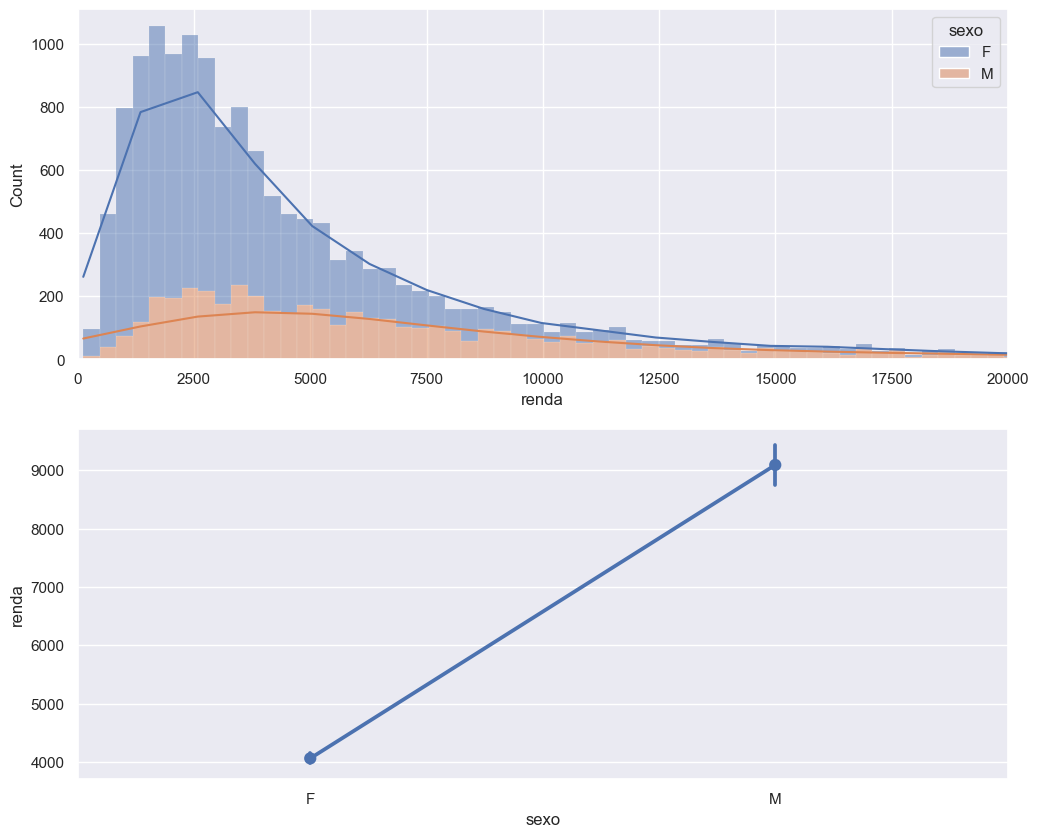

In [8]:
fig, axs = plt.subplots(2, figsize=[12,10])

sns.histplot(renda, 
             x = 'renda', 
             hue='sexo', 
             multiple='stack', 
             kde='True', 
             ax= axs[0])

sns.pointplot(data= renda, 
              y = 'renda', 
              x = 'sexo', 
              ax = axs[1])

axs[0].set_xlim(0, 20000)

Análise renda X idade

(0.0, 20000.0)

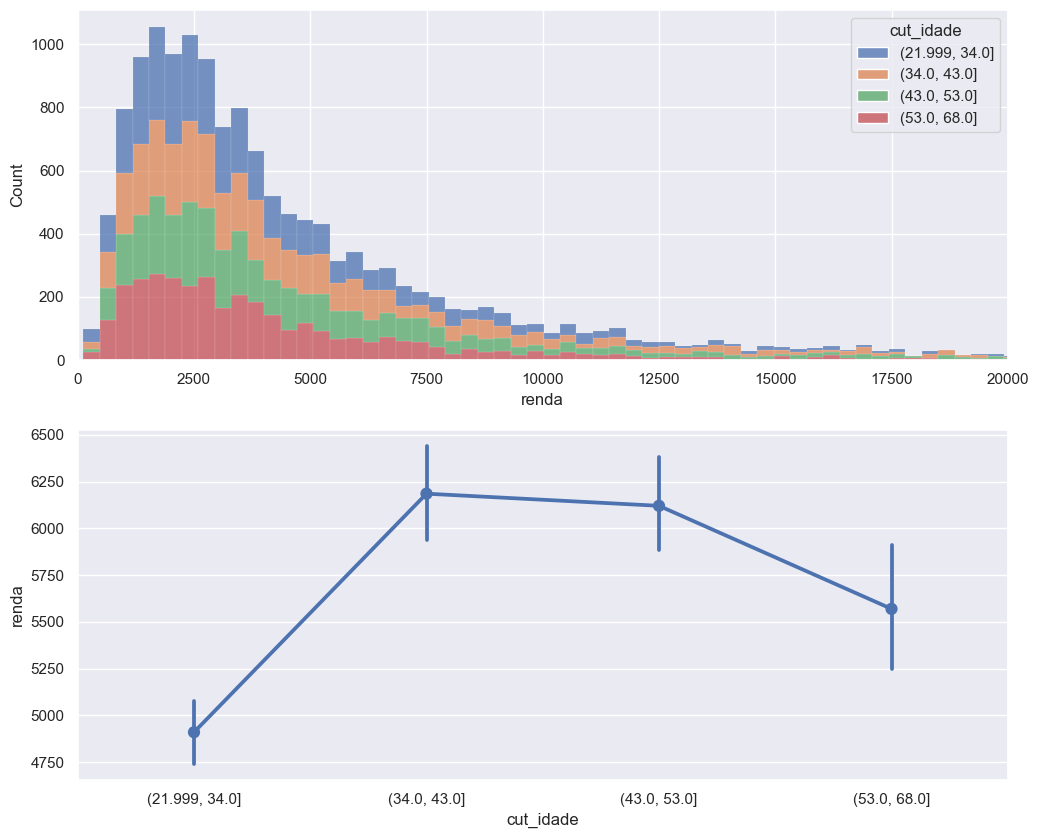

In [9]:
renda['cut_idade'] = pd.qcut(renda['idade'], 4)

fig, axs = plt.subplots(2, figsize=[12,10])

sns.histplot(renda, 
             x='renda', 
             hue='cut_idade', 
             multiple='stack', 
             ax= axs[0])

sns.pointplot(data=renda, 
              y = 'renda', 
              x = 'cut_idade', 
              ax= axs[1])

axs[0].set_xlim(0, 20000)

Análise renda X educação

(0.0, 20000.0)

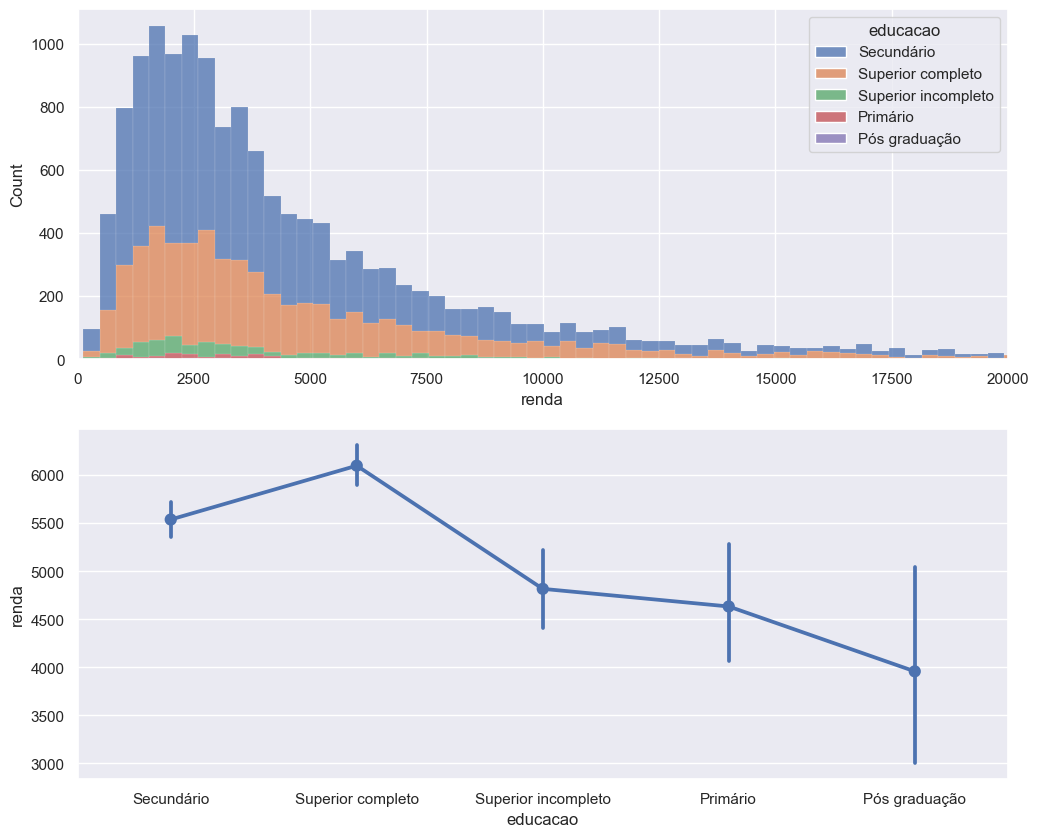

In [10]:
fig, axs = plt.subplots(2, figsize= [12, 10])

sns.histplot(renda,
            x= 'renda',
            hue= 'educacao',
            multiple= 'stack',
            ax= axs[0])

sns.pointplot(data= renda,
             y= 'renda',
             x= 'educacao',
             ax= axs[1])

axs[0].set_xlim(0, 20000) 

Análise renda X posse de imóvel

Text(0.5, 1.0, 'Posse de Imóvel X Renda')

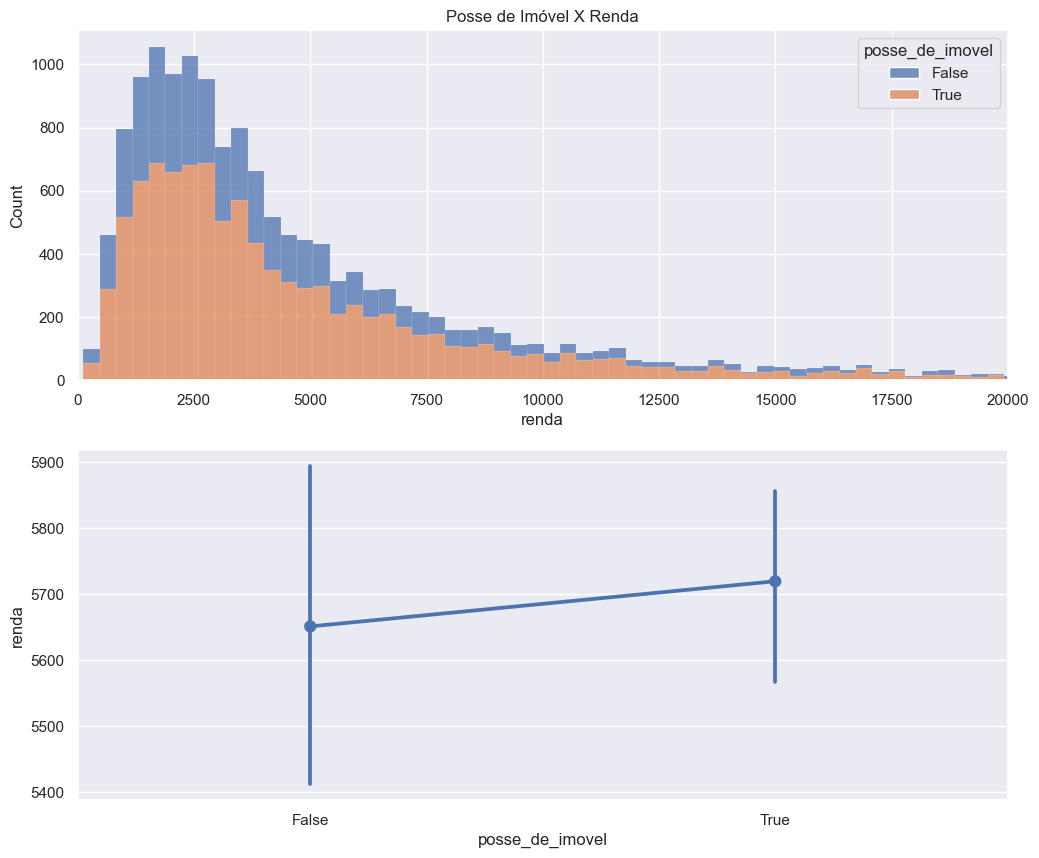

In [11]:
fig, axs = plt.subplots(2, figsize= [12, 10])

sns.histplot(renda,
            x= 'renda',
            hue= 'posse_de_imovel',
            multiple= 'stack',
            ax= axs[0])

sns.pointplot(data= renda,
             y= 'renda',
             x= 'posse_de_imovel',
             ax= axs[1])

axs[0].set_xlim(0, 20000)
axs[0].set_title('Posse de Imóvel X Renda')

Análise renda X posse de veículo

Text(0.5, 1.0, 'Posse de Veículo X Renda')

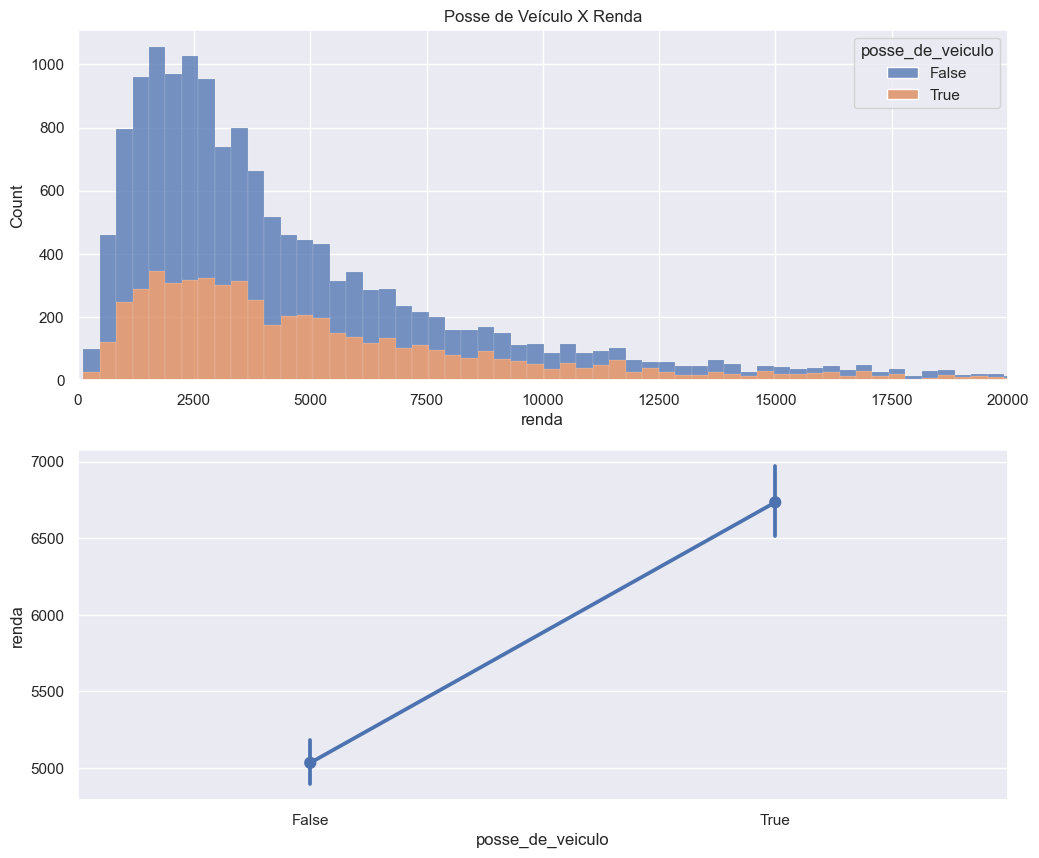

In [12]:
fig, axs = plt.subplots(2, figsize= [12, 10])

sns.histplot(renda,
            x= 'renda',
            hue= 'posse_de_veiculo',
            multiple= 'stack',
            ax= axs[0])

sns.pointplot(data= renda,
             y= 'renda',
             x= 'posse_de_veiculo',
             ax= axs[1])

axs[0].set_xlim(0, 20000)
axs[0].set_title('Posse de Veículo X Renda')

Análise renda X tipo de renda

(0.0, 20000.0)

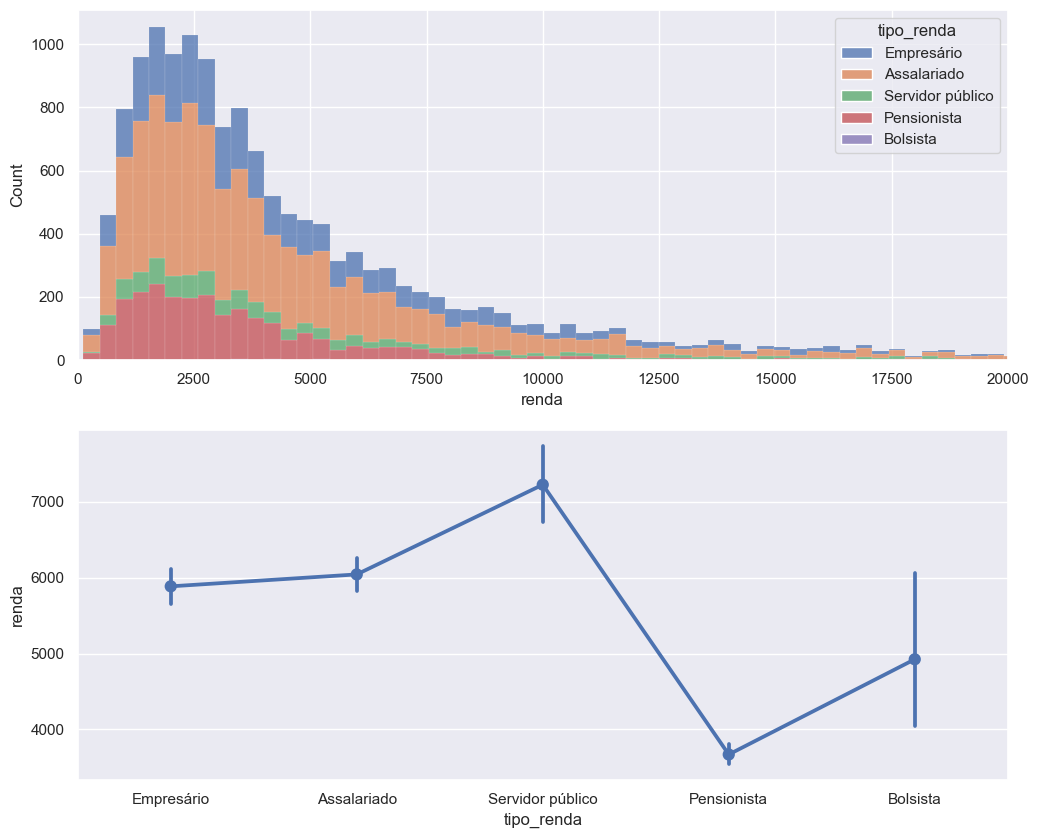

In [13]:
fig, axs = plt.subplots(2, figsize= [12, 10])

sns.histplot(renda,
            x= 'renda',
            hue= 'tipo_renda',
            multiple= 'stack',
            ax= axs[0])

sns.pointplot(data= renda,
             y= 'renda',
             x= 'tipo_renda',
             ax= axs[1])

axs[0].set_xlim(0, 20000)


Análise renda X tempo de emprego

(0.0, 20000.0)

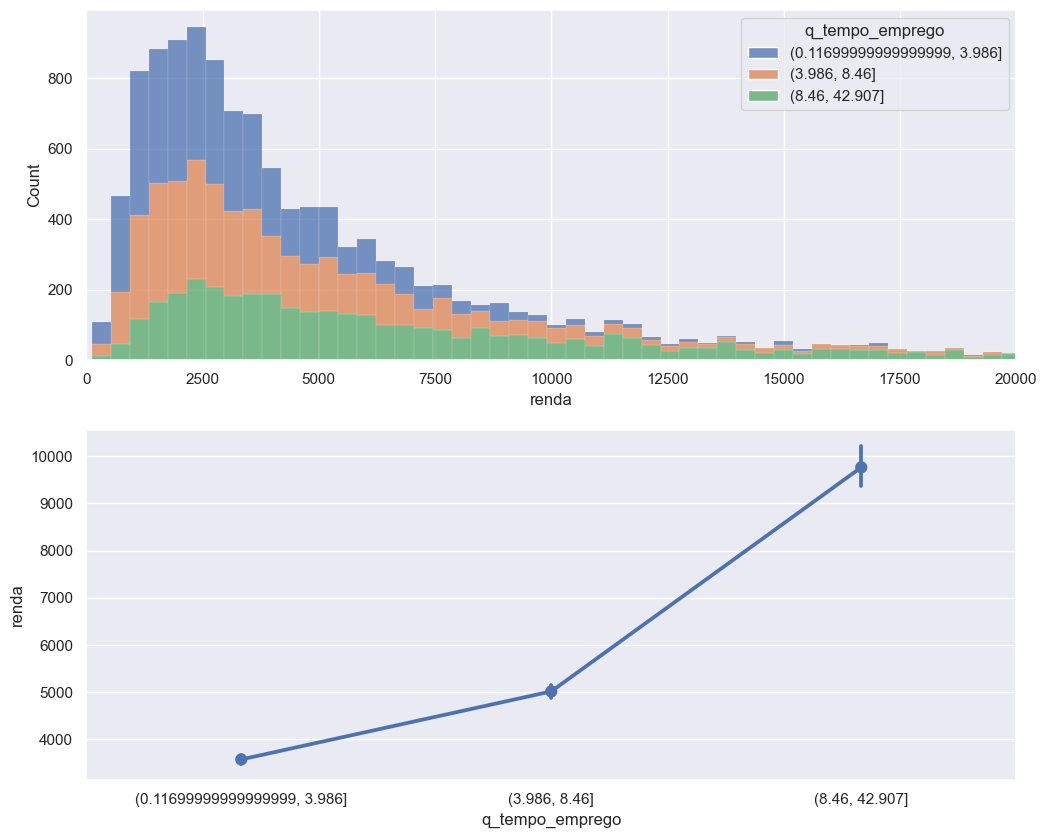

In [14]:
renda['q_tempo_emprego'] =  pd.qcut(renda['tempo_emprego'], 3)

fig, axs = plt.subplots(2, figsize=[12,10])

sns.histplot(renda, 
             x='renda', 
             hue='q_tempo_emprego', 
             multiple='stack', 
             ax = axs[0])

sns.pointplot(data= renda, 
              y = 'renda', 
              x = 'q_tempo_emprego', 
              ax = axs[1])

axs[0].set_xlim(0, 20000)

Análise renda X quantidade de filhos

(0.0, 20000.0)

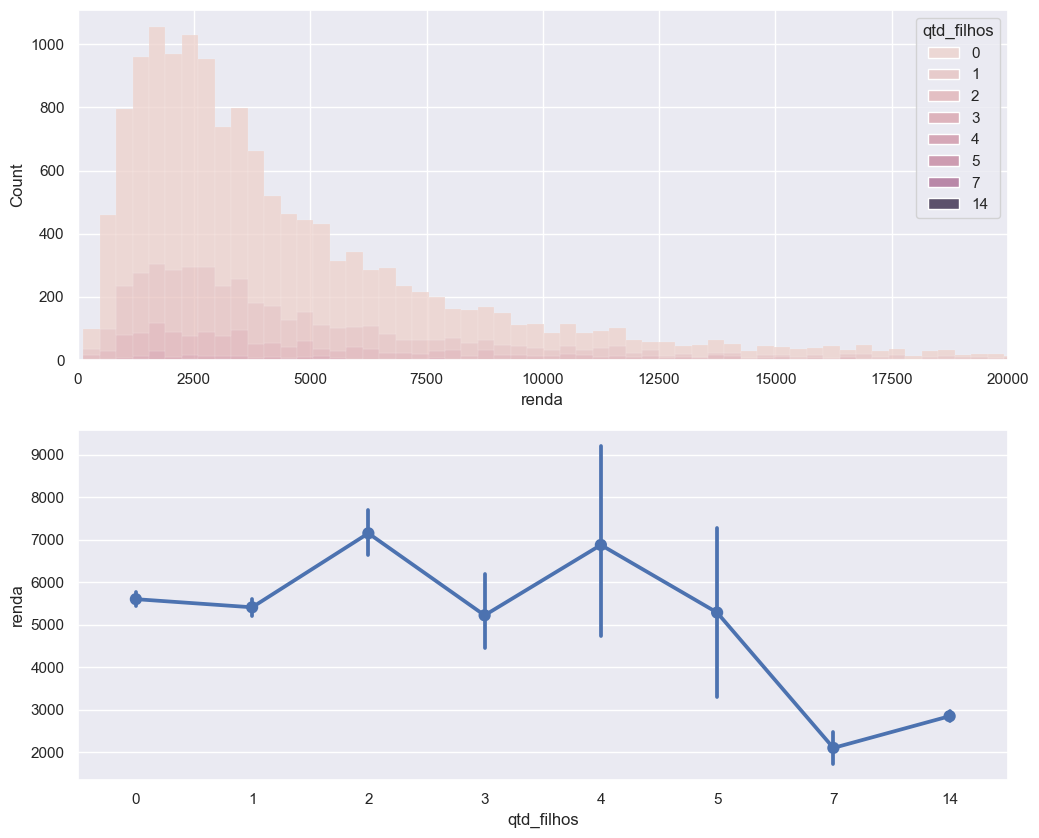

In [15]:
fig, axs = plt.subplots(2, figsize=[12,10])

sns.histplot(renda, 
             x = 'renda', 
             hue = 'qtd_filhos', 
             multiple = 'stack', 
             ax = axs[0])

sns.pointplot(data= renda, 
              y = 'renda', 
              x = 'qtd_filhos', 
              ax = axs[1])

axs[0].set_xlim(0,20000)

Análise renda X estado civil

(0.0, 20000.0)

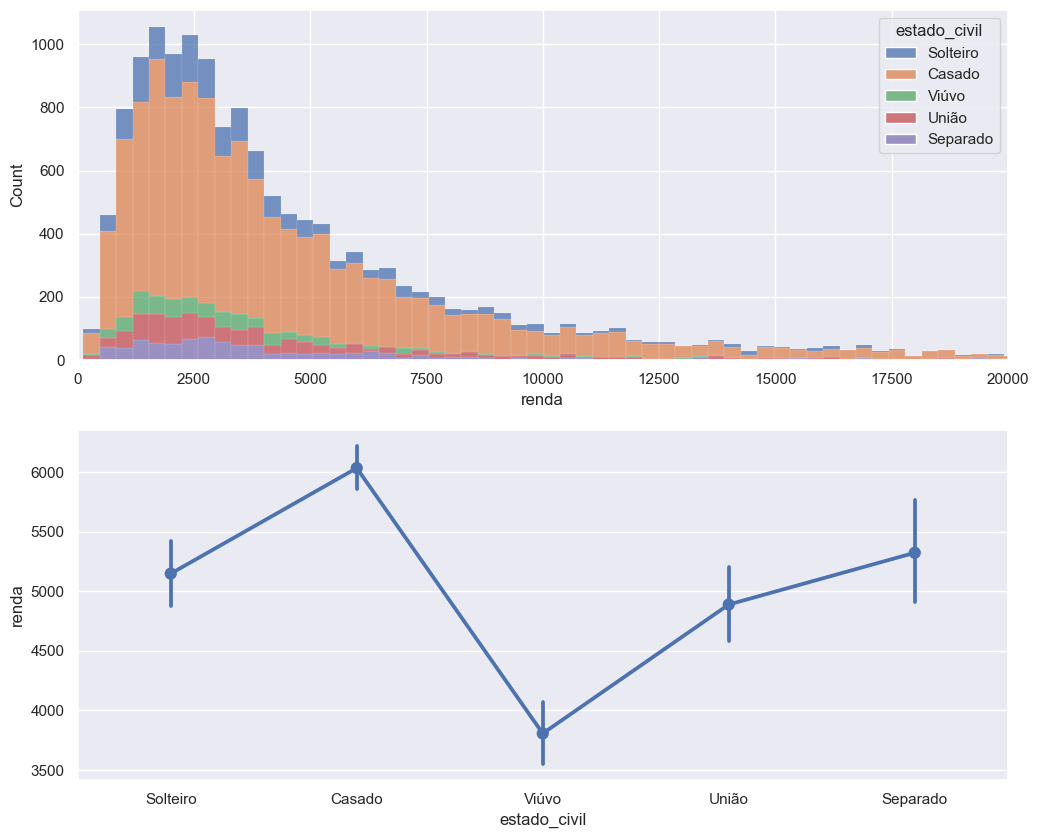

In [16]:
fig, axs = plt.subplots(2, figsize=[12,10])

sns.histplot(renda, 
             x = 'renda', 
             hue = 'estado_civil', 
             multiple = 'stack', 
             ax = axs[0])

sns.pointplot(data= renda, 
              y = 'renda', 
              x = 'estado_civil', 
              ax = axs[1])

axs[0].set_xlim(0,20000)

Insights dos gráficos

- Renda x sexo --> o sexo Masculino (M) tem uma media de renda acima do que o sexo Feminino (F).<br>
<br/>  

- Renda x idade --> percebe-se uma renda menor em pessoas mais novas, entre 22 a 34 anos.<br>
<br/>

- Renda x educacao --> as pessoas com superior completo possuem uma renda maior que a maioria.<br>
<br/>

- Renda x posse_de_veiculo --> as pessoas que possuem veiculo possuem uma renda maior que as pessoas sem veiculos.<br>
<br/>

- Renda x tipo_renda --> as pessoas que são servidores publicos possuem renda maior que as outras variaveis.<br>
<br/>

- Renda x q_tempo_emprego --> pessoas com um tempo de emprego maior possuem uma renda mais alta.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



## Seleção: 

- excluido colunas desnecessárias

In [17]:
renda.columns

Index(['Unnamed: 0', 'data_ref', 'id_cliente', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda', 'cut_idade', 'q_tempo_emprego'],
      dtype='object')

In [18]:
renda.drop(columns= ['Unnamed: 0', 'id_cliente', 'data_ref', 'idade','cut_idade', 'q_tempo_emprego'], inplace= True)

## Limpeza:

- Verificando e tratando dados faltantes 

In [19]:
renda.isna().sum()

sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [20]:
renda['tempo_emprego'].fillna(0, inplace=True) 

In [21]:
renda.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

## Formatação:

- Filtrando dados na variável 'renda' e 'qtd_filhos'

In [22]:
renda = renda[renda['renda'] < 20000] 

In [23]:
renda = renda[renda['qtd_filhos'] < 14] 

In [24]:
renda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14472 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   14472 non-null  object 
 1   posse_de_veiculo       14472 non-null  bool   
 2   posse_de_imovel        14472 non-null  bool   
 3   qtd_filhos             14472 non-null  int64  
 4   tipo_renda             14472 non-null  object 
 5   educacao               14472 non-null  object 
 6   estado_civil           14472 non-null  object 
 7   tipo_residencia        14472 non-null  object 
 8   tempo_emprego          14472 non-null  float64
 9   qt_pessoas_residencia  14472 non-null  float64
 10  renda                  14472 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(5)
memory usage: 1.1+ MB


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


### Selecionando a técnica de modelagem:
Modelo de Regressão da biblioteca Statsmodels -> Modelo Árvore de regressão

In [25]:
renda.head(5)

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,4.293151,1.0,6475.97


In [26]:
df = renda.copy(deep=True)

Rodando o modelo stepwise, avaliando na base de testes

In [27]:
df_dummies = pd.get_dummies(data= df.dropna(), drop_first= True).astype(int)

X = df_dummies.drop(columns='renda')
y = df_dummies['renda']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
  
    included = list(initial_list)
    while True:
        changed=False
        
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("#############")
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [29]:
variaveis = stepwise_selection(X_test, y_test)

Add  tempo_emprego                  with p-value 5.1707e-110
#############
['tempo_emprego']
Add  sexo_M                         with p-value 5.16174e-119
#############
['tempo_emprego', 'sexo_M']
Add  tipo_renda_Pensionista         with p-value 2.56931e-14
#############
['tempo_emprego', 'sexo_M', 'tipo_renda_Pensionista']
Add  tipo_renda_Empresário          with p-value 7.75651e-06
#############
['tempo_emprego', 'sexo_M', 'tipo_renda_Pensionista', 'tipo_renda_Empresário']
Add  posse_de_imovel                with p-value 0.000868659
#############
['tempo_emprego', 'sexo_M', 'tipo_renda_Pensionista', 'tipo_renda_Empresário', 'posse_de_imovel']
Add  tipo_renda_Servidor público    with p-value 0.024366
#############
['tempo_emprego', 'sexo_M', 'tipo_renda_Pensionista', 'tipo_renda_Empresário', 'posse_de_imovel', 'tipo_renda_Servidor público']
#############
['tempo_emprego', 'sexo_M', 'tipo_renda_Pensionista', 'tipo_renda_Empresário', 'posse_de_imovel', 'tipo_renda_Servidor público']


In [30]:
print('resulting features:\n')
print(variaveis)

resulting features:

['tempo_emprego', 'sexo_M', 'tipo_renda_Pensionista', 'tipo_renda_Empresário', 'posse_de_imovel', 'tipo_renda_Servidor público']


In [31]:
X = df_dummies[variaveis]
y = df_dummies['renda']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

y_pred = sm.OLS(y_train, X_train).fit().predict(X_test)

print(f'R-squared: {r2_score(y_test, y_pred)}')

R-squared: 0.24691288995837368


Regressão ridge com alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

In [32]:
alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]
r2_y_pred = []

for alpha in alphas:
    md = sm.OLS(y_train, X_train)
    reg = md.fit_regularized(method='elastic_net', 
                             refit=True, 
                             L1_wt=0,  # ridge
                             alpha=alpha)
    y_pred = reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    r2_y_pred.append(r2)
    print(f'Alpha {alpha}: \nR-squared = {r2}\n')
    
pd.DataFrame({'alpha':alphas, 
              '𝑅2':r2_y_pred}).sort_values(by='𝑅2', ascending=False)

Alpha 0: 
R-squared = 0.24691288995837368

Alpha 0.001: 
R-squared = 0.24690708131612848

Alpha 0.005: 
R-squared = 0.2467588266160412

Alpha 0.01: 
R-squared = 0.24632826892348503

Alpha 0.05: 
R-squared = 0.23718166643300154

Alpha 0.1: 
R-squared = 0.21992464593151095



,alpha,𝑅2
0,0.000,0.246913
1,0.001,0.246907
2,0.005,0.246759
3,0.010,0.246328
4,0.050,0.237182
5,0.100,0.219925


Regressão Lasso com alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

In [33]:
alphas = [0, 0.001, 0.005, 0.01, 0.05, 0.1]
r2_y_pred = []

for alpha in alphas:
    md = sm.OLS(y_train, X_train)
    reg = md.fit_regularized(method='elastic_net', 
                             refit=True, 
                             L1_wt=1,  # lasso 
                             alpha=alpha)
    y_pred = reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    r2_y_pred.append(r2)
    print(f'Alpha {alpha}: \nR-squared = {r2}\n')
    
pd.DataFrame({'alpha':alphas, 
              '𝑅2':r2_y_pred}).sort_values(by='𝑅2', ascending=False)

Alpha 0: 
R-squared = 0.24691288995837368

Alpha 0.001: 
R-squared = 0.24691288995837368

Alpha 0.005: 
R-squared = 0.24691288995837368

Alpha 0.01: 
R-squared = 0.24691288995837368

Alpha 0.05: 
R-squared = 0.24691288995837368

Alpha 0.1: 
R-squared = 0.24691288995837368



,alpha,𝑅2
0,0.000,0.246913
1,0.001,0.246913
2,0.005,0.246913
3,0.010,0.246913
4,0.050,0.246913
5,0.100,0.246913


## Etapa 5 Crisp-DM: Avaliação dos resultados

Ajustando a árvore de regressão

In [34]:
X = df_dummies[variaveis]
y = df_dummies['renda']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

reg_tree = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_leaf=13)
reg_tree.fit(X_train, y_train)

print(f'Coeficiente de determinação 𝑅2 na base de testes: {reg_tree.score(X=X_test, y=y_test)*100:2f}')

Coeficiente de determinação 𝑅2 na base de testes: 29.370162


Com base no modelo criado, as variáveis que possuem maior importância para definição da renda e com base no modelo stepwise, são:

['tempo_emprego', 'sexo_M', 'tipo_renda_Pensionista', 'tipo_renda_Empresário', 'posse_de_imovel', 'tipo_renda_Servidor público']

Com essas variáveis o modelo obteve um R² de 29.37 